## Financial Data Preprocessing


In [ ]:
import os
import sys

In [ ]:
REPO_ROOT = "/Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio"
sys.path.append(REPO_ROOT)

In [ ]:
from config import config, config_indicators
from preprocessor.findata_downloader import FinancialDataDownloader
from preprocessor.findata_preprocessor import FinancialDataPreprocessor
from visualiser.findata_visualiser import FinancialDataVisualiser

In [ ]:
data_dir = f"{REPO_ROOT}/{config.DATA_DIR}/{config.DATASET_NAME}"
plot_dir = (
    f"{REPO_ROOT}/{config.PLOT_DIR}/{config.TICKERS_NAME}/{config.DATASET_NAME}"
)

if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [ ]:
findownloader = FinancialDataDownloader(
    start_date=config.START_DATE,
    end_date=config.END_DATE,
)
data = findownloader.load_data(
    directory=data_dir,
    filename=config.TICKERS_NAME,
)

Data loaded from /Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/data/simple-dataset/test.csv


In [ ]:
finpreprocessor = FinancialDataPreprocessor(
    start_date=config.START_DATE,
    end_date=config.END_DATE,
)
data = finpreprocessor.preprocess(
    data=data,
    exchange=config.EXCHANGE,
    use_tech_indicators=config.USE_TECHNICAL_INDICATORS,
    tech_indicators=list(config_indicators.TECHNICAL_INDICATORS.keys()),
    use_macro_indicators=config.USE_MACROECONOMIC_INDICATORS,
    macro_indicators=list(config_indicators.MACROECONOMIC_INDICATORS.keys()),
)

In [ ]:
data.head()

,date,tic,open,high,low,close,volume,day
0,2016-01-04,AAPL,23.184075,23.807680,23.046249,23.803160,270597600.0,0
5,2016-01-05,AAPL,23.893544,23.916138,23.138893,23.206675,223164000.0,1
10,2016-01-06,AAPL,22.720891,23.129851,22.564992,22.752523,273829600.0,2
15,2016-01-07,AAPL,22.296122,22.623740,21.787749,21.792267,324377600.0,3
20,2016-01-08,AAPL,22.266745,22.393273,21.862306,21.907494,283192000.0,4


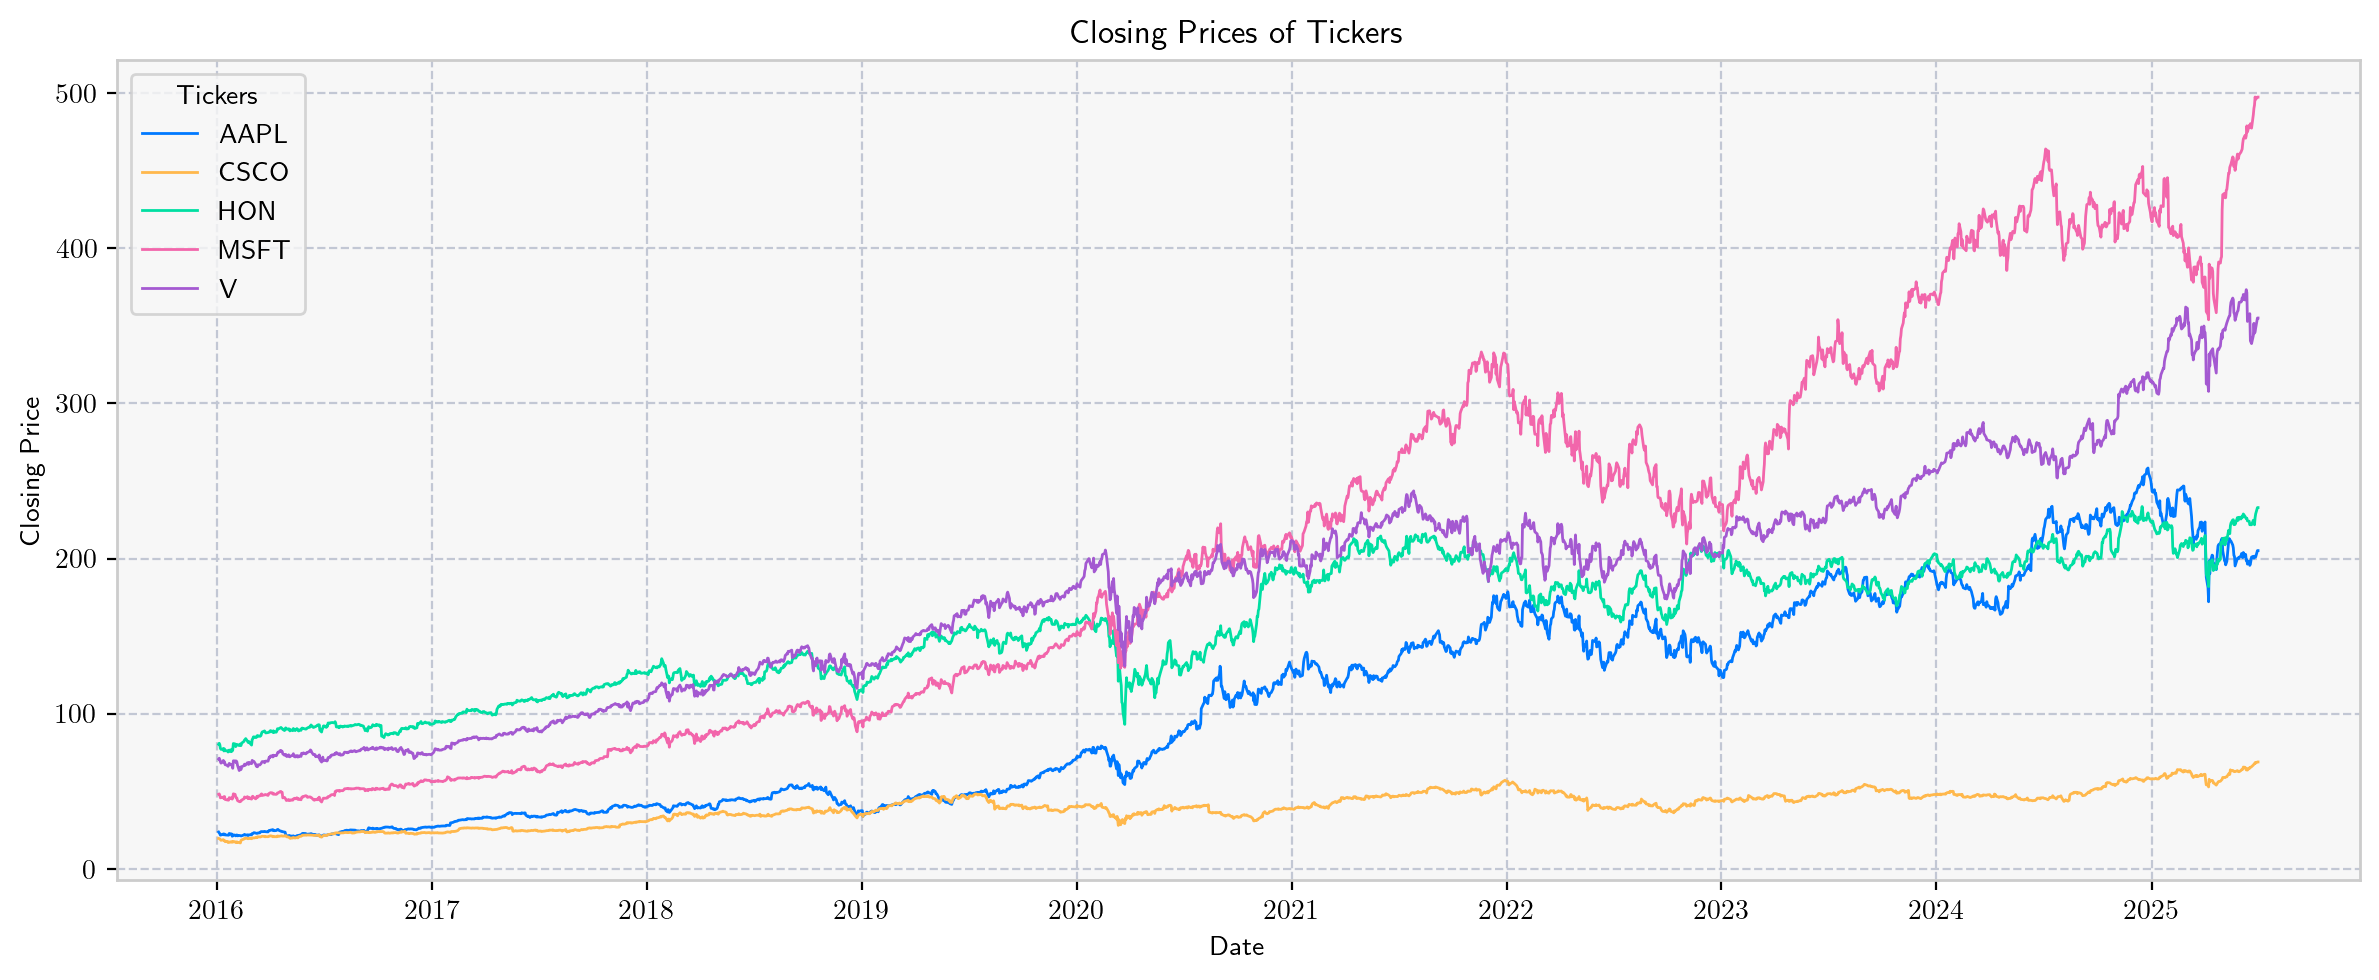

In [ ]:
finvisualiser = FinancialDataVisualiser(directory=plot_dir)
finvisualiser.plot_close_prices(
    data=data,
    filename="processed_close_prices",
)

In [ ]:
if config.USE_TECHNICAL_INDICATORS:
    finvisualiser.plot_technical_indicators(
        data=data,
        indicators=config_indicators.TECHNICAL_INDICATORS,
    )

In [ ]:
if config.USE_MACROECONOMIC_INDICATORS:
    finvisualiser.plot_macroeconomic_indicators(
        data=data,
        indicators=config_indicators.MACROECONOMIC_INDICATORS,
    )

In [ ]:
train_data, test_data = finpreprocessor.split_train_test(
    data=data,
    test_start_date=config.TEST_START_DATE,
)

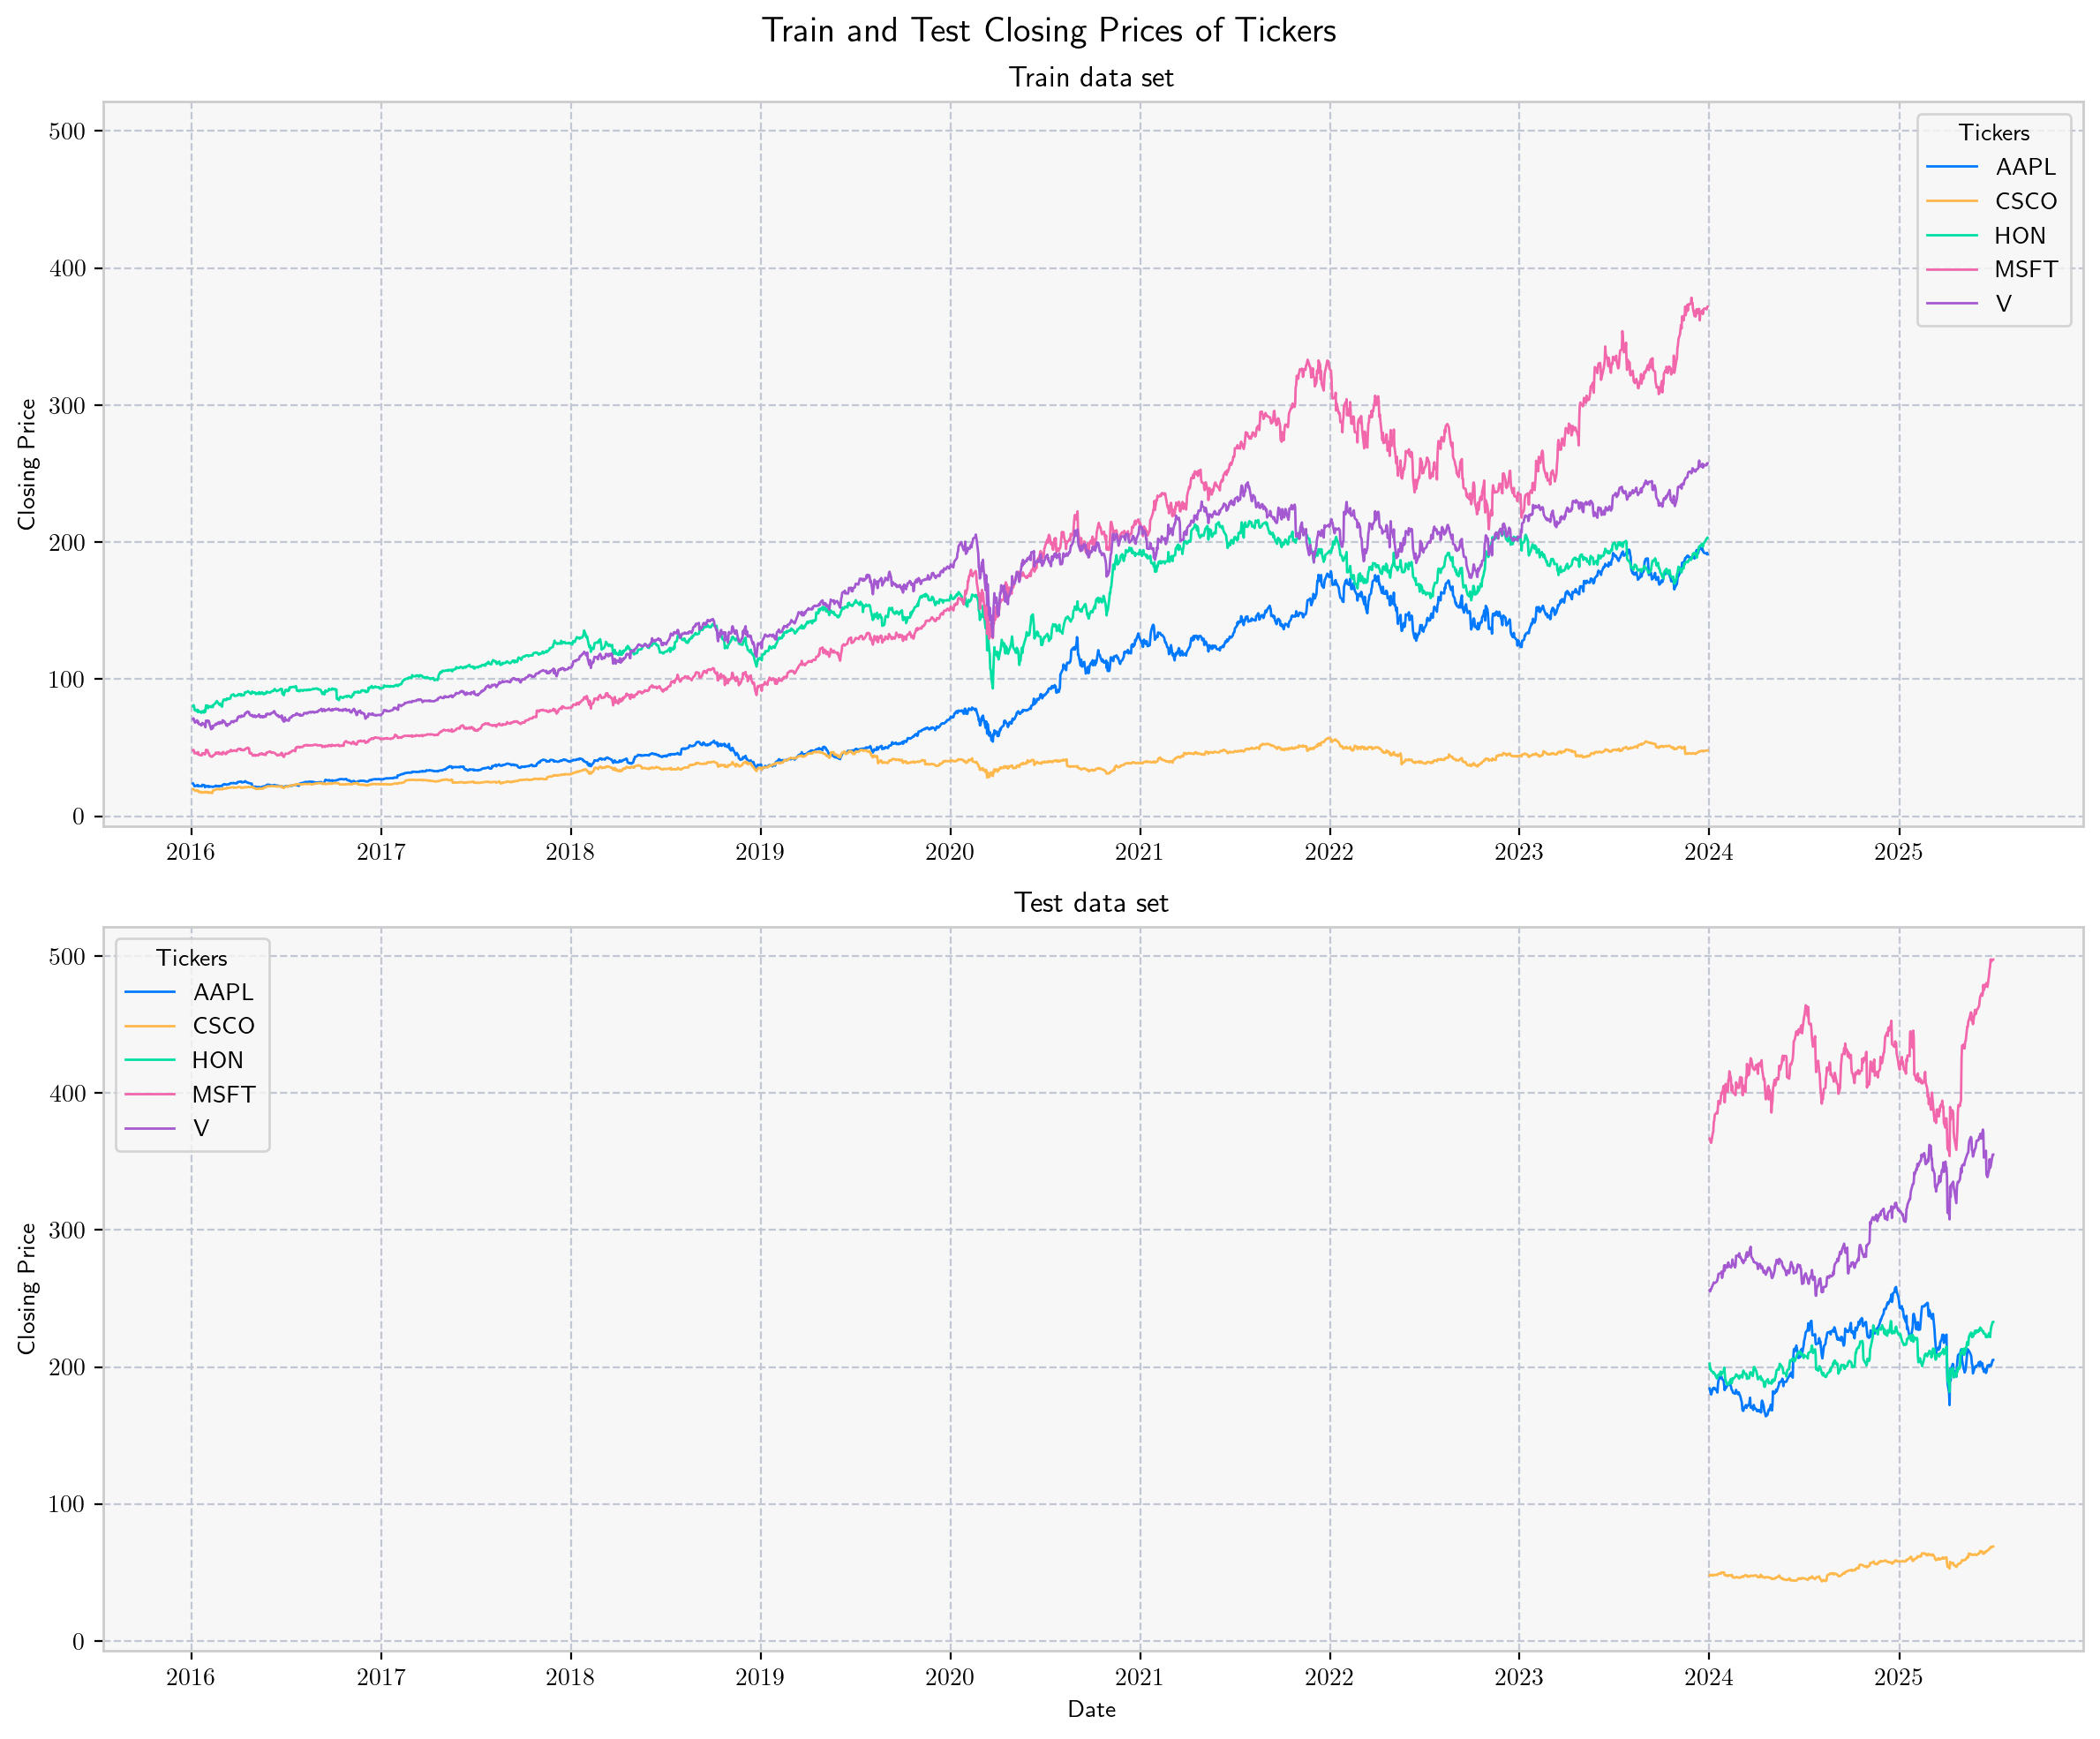

In [ ]:
finvisualiser.plot_train_test_close_prices(
    train_data=train_data,
    test_data=test_data,
)

In [ ]:
finpreprocessor.save_train_test_data(
    train_data=train_data,
    test_data=test_data,
    directory=data_dir,
    filename=config.TICKERS_NAME,
)

Train data saved to /Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/data/simple-dataset/test_train.csv
Test data saved to /Users/ingridperez/Documents/GitHub Repositiories/xdl-portfolio/data/simple-dataset/test_trade.csv
